In [1]:
%%javascript
document.title='Jupyter Lab - Analyzer.ipynb'

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression
import calendar
import numpy as np
import json
import seaborn as sns
import os 
import glob
from pprint import pprint
from time import time
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

SHEET_NAME = 'Summary of the Malicious IoT Sc'
FILE_NAME = 'IoT-23 Dataset details.xlsx'
DATASET_PATH = 'IoTScenarios/' #path to dataset folder, note that there is a slash at the end

def get_dates():
    output = []
    for index in range(df.shape[0]):
        file_name = 'IoTScenarios/' + df.at[index,'Name of Dataset'] + '/bro/conn.log.labeled'
        with open(file_name) as fp:
            for i, line in enumerate(fp):
                if i == 8:
                    parsed = line.split('\x09')
                    parsed = parsed[:-1] + [el for el in parsed[-1].split(' ') if len(el)>0]
                    output.append(pd.Timestamp(float(parsed[0]), unit='s').to_period("D"))
                    break
    return output

def get_last_dates():
    close = []
    last = []
    for index in range(df.shape[0]):
        file_name = 'IoTScenarios/' + df.at[index,'Name of Dataset'] + '/bro/conn.log.labeled'
        with open(file_name, 'rb') as fp:
            br = BackwardsReader(fp)
            for i in range(3):
                line = br.readline()
                if i == 1:
                    date_string = line.split('\x09')[1].strip()
                    date_as_date = datetime.strptime(date_string, '%Y-%m-%d-%H-%M-%S')
                    close.append(pd.Timestamp(date_as_date).to_period("D"))
                elif i == 2:
                    timestamp = pd.Timestamp(float(line.split('\x09')[0]), unit='s').to_period("D")
                    last.append(timestamp)
    return last, close

In [2]:

df = pd.read_excel(FILE_NAME,sheet_name=SHEET_NAME, header=0, index_col=0)
df['Analysis Start'] = df['Analysis Start'].astype('datetime64').apply(lambda x: x.tz_localize('CET'))
df['Analysis End'] = df['Analysis End'].astype('datetime64').apply(lambda x: x.tz_localize('CET'))
df = df.sort_values(by=['Analysis Start']).reset_index(drop=True)
# df['Start date'] = get_dates()
# df['End date'], df['Close date'] = get_last_dates()

df = df[df.columns.to_list()[:3] + df.columns.to_list()[-3:] + df.columns.to_list()[3:-3]]
# df = df.sort_values(by=['Start date']).reset_index(drop=True)
df = df.sort_values(by=['#ZeekFlows']).reset_index(drop=True)

df

Name of Dataset  Duration(hrs)   #Packets  \
0   CTU-IoT-Malware-Capture-44-1              2    1309000   
1   CTU-IoT-Malware-Capture-20-1             24      50000   
2   CTU-IoT-Malware-Capture-21-1             24      50000   
3   CTU-IoT-Malware-Capture-42-1              8      24000   
4    CTU-IoT-Malware-Capture-8-1             24      23000   
5   CTU-IoT-Malware-Capture-34-1             24     233000   
6    CTU-IoT-Malware-Capture-3-1             36     496000   
7    CTU-IoT-Malware-Capture-1-1            112    1686000   
8   CTU-IoT-Malware-Capture-48-1             24   13000000   
9   CTU-IoT-Malware-Capture-60-1             24  271000000   
10  CTU-IoT-Malware-Capture-49-1              8   18000000   
11   CTU-IoT-Malware-Capture-9-1             24    6437000   
12  CTU-IoT-Malware-Capture-35-1             24   46000000   
13   CTU-IoT-Malware-Capture-7-1             24   11000000   
14  CTU-IoT-Malware-Capture-36-1             24   13000000   
15  CTU-IoT-Malware-Capture-52-1             24   64000000   
16  CTU-IoT-Malware-Capture-33-1             24   54000000   
17  CTU-IoT-Malware-Capture-17-1             24  109000000   
18  CTU-IoT-Malware-Capture-43-1              1   82000000   
19  CTU-IoT-Malware-Capture-39-1              7   73000000   

                Analysis End  \
0  2020-02-09 17:13:00+01:00   
1  2020-02-09 20:58:00+01:00   
2  2020-02-09 21:05:00+01:00   
3  2020-02-10 12:39:00+01:00   
4  2020-02-10 12:38:00+01:00   
5  2020-02-09 20:55:00+01:00   
6  2020-02-10 12:35:00+01:00   
7  2020-02-10 12:28:00+01:00   
8  2020-02-09 23:19:00+01:00   
9  2020-02-10 04:01:00+01:00   
10 2020-02-09 17:01:00+01:00   
11 2020-02-09 23:08:00+01:00   
12 2020-02-09 22:16:00+01:00   
13 2020-02-09 21:13:00+01:00   
14 2020-02-09 23:33:00+01:00   
15 2020-02-09 19:12:00+01:00   
16 2020-02-09 22:53:00+01:00   
17 2020-02-06 15:32:00+01:00   
18 2020-02-09 15:11:00+01:00   
19 2020-02-09 16:18:00+01:00   

                                             Comments  \
0   ELF Files over HTTP (+Spam) + Tor Nodes + Inva...   
1   ET Chat IRC authorization + Tor Nodes + Invali...   
2                                       Tor+SMTP (fr)   
3   ET Chat IRC authorization + ELF + TROJAN + DNS...   
4                                                (fr)   
5   ET Chat IRC PONG+JOIN+NICK Command+authorizati...   
6                 ET SSH Scan + Ransomware + IRC Join   
7   ET DROP Spamhaus + DNS + Eventscan + missing H...   
8                         ELF Files over HTTP (+Spam)   
9                          Package Manager + SMTP(fr)   
10  ELF Files over HTTP (+Spam) + Tor Nodes + Inva...   
11  ET P2P BitTorrent DHT Request + Tor Nodes +  P...   
12        ET DROP Spamhaus + ELF + Package Management   
13                       ET DROP Spamhaus + Tor Nodes   
14                                               (fr)   
15                                         Ransomware   
16                                   ET DROP Spamhaus   
17                            Ransomware+Spamhaus+ELF   
18                                  Harmful SSH Scans   
19                                  Harmful SSH Scans   

                                          Unnamed: 10  #ZeekFlows Pcap Size  \
0   ET POLICY Executable and linking format (ELF) ...         238    1.7 GB   
1                                                 NaN        3210    3.9 MB   
2                                                 NaN        3287    3.9 MB   
3                                                 NaN        4427    2.8 MB   
4                                                 NaN       10404    2.1 MB   
5                                                 NaN       23146    121 MB   
6                                                 NaN      156104     56 MB   
7                                                 NaN     1008749    140 MB   
8                                                 NaN     3394347      1.2G   
9                                                 NaN

In [135]:
df.loc[df['Name of Dataset'].isin(a_list)]

Name of Dataset  Duration(hrs)   #Packets  Start date  \
4    CTU-IoT-Malware-Capture-8-1             24      23000  2018-07-31   
5   CTU-IoT-Malware-Capture-17-1             24  109000000  2018-09-06   
6   CTU-IoT-Malware-Capture-20-1             24      50000  2018-10-02   
7   CTU-IoT-Malware-Capture-21-1             24      50000  2018-10-03   
9   CTU-IoT-Malware-Capture-34-1             24     233000  2018-12-21   
10  CTU-IoT-Malware-Capture-35-1             24   46000000  2018-12-21   
12  CTU-IoT-Malware-Capture-39-1              7   73000000  2019-01-09   
13  CTU-IoT-Malware-Capture-44-1              2    1309000  2019-01-10   
15  CTU-IoT-Malware-Capture-42-1              8      24000  2019-01-10   
16  CTU-IoT-Malware-Capture-49-1              8   18000000  2019-02-28   
17  CTU-IoT-Malware-Capture-48-1             24   13000000  2019-02-28   
18  CTU-IoT-Malware-Capture-52-1             24   64000000  2019-03-08   
19  CTU-IoT-Malware-Capture-60-1             24  271000000  2019-09-20   

      End date  Close date  #ZeekFlows Pcap Size     Name  \
4   2018-08-01  2018-08-08       10404    2.1 MB    Hakai   
5   2018-09-07  2019-11-15    54659864    7.8 GB  Kenjiro   
6   2018-10-03  2019-10-18        3210    3.9 MB    Torii   
7   2018-10-04  2019-10-20        3287    3.9 MB    Torii   
9   2018-12-22  2019-03-15       23146    121 MB    Mirai   
10  2018-12-22  2019-01-02    10447796      3.6G    Mirai   
12  2019-01-10  2019-05-03    73568982     5.3GB   IRCBot   
13  2019-01-10  2019-01-11         238    1.7 GB    Mirai   
15  2019-01-10  2019-01-11        4427    2.8 MB   Trojan   
16  2019-03-01  2019-03-05     5410562    1.3 GB    Mirai   
17  2019-03-01  2019-03-04     3394347      1.2G    Mirai   
18  2019-03-09  2019-07-12    19781379    4.6 GB    Mirai   
19  2019-09-21  2019-11-07     3581029     21 GB   Gagfyt   

              Analysis Start              Analysis End  \
4  2020-02-10 12:37:00+01:00 2020-02-10 12:38:00+01:00   
5  2020-02-06 13:35:00+01:00 2020-02-06 15:32:00+01:00   
6  2020-02-09 20:57:00+01:00 2020-02-09 20:58:00+01:00   
7  2020-02-09 21:02:00+01:00 2020-02-09 21:05:00+01:00   
9  2020-02-09 20:52:00+01:00 2020-02-09 20:55:00+01:00   
10 2020-02-09 21:12:00+01:00 2020-02-09 22:16:00+01:00   
12 2020-02-09 15:27:00+01:00 2020-02-09 16:18:00+01:00   
13 2020-02-09 17:10:00+01:00 2020-02-09 17:13:00+01:00   
15 2020-02-10 12:38:00+01:00 2020-02-10 12:39:00+01:00   
16 2020-02-09 16:51:00+01:00 2020-02-09 17:01:00+01:00   
17 2020-02-09 23:14:00+01:00 2020-02-09 23:19:00+01:00   
18 2020-02-09 18:41:00+01:00 2020-02-09 19:12:00+01:00   
19 2020-02-09 23:33:00+01:00 2020-02-10 04:01:00+01:00   

                                             Comments  \
4                                                (fr)   
5                             Ransomware+Spamhaus+ELF   
6   ET Chat IRC authorization + Tor Nodes + Invali...   
7                                       Tor+SMTP (fr)   
9   ET Chat IRC PONG+JOIN+NICK Command+authorizati...   
10        ET DROP Spamhaus + ELF + Package Management   
12                                  Harmful SSH Scans   
13  ELF Files over HTTP (+Spam) + Tor Nodes + Inva...   
15  ET Chat IRC authorization + ELF + TROJAN + DNS...   
16  ELF Files over HTTP (+Spam) + Tor Nodes + Inva...   
17                        ELF Files over HTTP (+Spam)   
18                                         Ransomware   
19                         Package Manager + SMTP(fr)   

                                          Unnamed: 10  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
9                                                 NaN  
10                                                NaN  
12                                                NaN  
13  ET POLICY Executable and linking format (ELF) ...  
15       

In [133]:
a_list = ['CTU-IoT-Malware-Capture-44-1',
 'CTU-IoT-Malware-Capture-20-1',
 'CTU-IoT-Malware-Capture-21-1',
 'CTU-IoT-Malware-Capture-42-1',
 'CTU-IoT-Malware-Capture-60-1',
 'CTU-IoT-Malware-Capture-34-1',
 'CTU-IoT-Malware-Capture-48-1',
 'CTU-IoT-Malware-Capture-35-1',
 'CTU-IoT-Malware-Capture-49-1',
 'CTU-IoT-Malware-Capture-52-1',
 'CTU-IoT-Malware-Capture-8-1',
 'CTU-IoT-Malware-Capture-17-1',
 'CTU-IoT-Malware-Capture-39-1']

In [4]:
def read_snort_log(index=0):
#     pd.concat([df1, df2])
#     csvs = glob.glob(os.listdir(DATASET_PATH + df.at[index,'Name of Dataset'] + '/bro/snort/')
#     print(csvs)
    csv = pd.read_csv('snort.log.1525824000' + '.csv',  dtype='str', index_col=0)
    csv.drop(csv['Protocol'][csv['Protocol'] == 'ARP'].index, inplace=True)
    split = csv['Info'].str.split('>', 3, expand=True)
    csv.drop('Info', axis='columns', inplace=True)
    csv.drop(split.loc[pd.isna(split[1]),:].index, inplace=True)
    split.drop(split.loc[pd.isna(split[1]),:].index, inplace=True)

    src_port = split[0].str.strip().str.rsplit(' ', expand=True, n=1)
    src_port.loc[pd.isna(src_port[1]),2] = src_port.loc[pd.isna(src_port[1]), 0]
    src_port.loc[~pd.isna(src_port[1]),2] = src_port.loc[~pd.isna(src_port[1]), 1]
    csv['src_port'] = src_port[2].astype(int).astype(str)
    csv['dst_port'] = split[1].str.strip().str.split(' ', expand=True, n=1).loc[:,0].astype(int).astype(str)
    csv['key'] = csv[['Source', 'src_port', 'Destination', 'dst_port']].apply('_'.join, axis=1)

    csv_grouped = csv.groupby(['key'],as_index=False).last()
    csv_grouped.loc[:,'count_snort'] = csv.groupby(['key'],as_index=False).count()['Length']
    csv_grouped['snort_alerted'] = True


    return csv_grouped

def read_snort_logs_all(index=0):
    csvs_file_names = glob.glob(DATASET_PATH + df.at[index,'Name of Dataset'] + '/bro/snort/*.csv')
    csvs = []
    for csv_file_name in csvs_file_names:            
        csv = pd.read_csv(csv_file_name,  dtype='str', index_col=0)
        csv.drop(csv['Protocol'][csv['Protocol'] == 'ARP'].index, inplace=True)
        split = csv['Info'].str.split('>', 3, expand=True)
        csv.drop('Info', axis='columns', inplace=True)
        csv.drop(split.loc[pd.isna(split[1]),:].index, inplace=True)
        split.drop(split.loc[pd.isna(split[1]),:].index, inplace=True)

        src_port = split[0].str.strip().str.rsplit(' ', expand=True, n=1)
        src_port.loc[pd.isna(src_port[1]),2] = src_port.loc[pd.isna(src_port[1]), 0]
        src_port.loc[~pd.isna(src_port[1]),2] = src_port.loc[~pd.isna(src_port[1]), 1]
        csv['src_port'] = src_port[2].astype(int).astype(str)
        csv['dst_port'] = split[1].str.strip().str.split(' ', expand=True, n=1).loc[:,0].astype(int).astype(str)
        csv['key'] = csv[['Source', 'src_port', 'Destination', 'dst_port']].apply('_'.join, axis=1)
        csvs.append(csv)

#         csv_grouped = csv.groupby(['key'],as_index=False).last()
#         csv_grouped.loc[:,'count'] = csv.groupby(['key'],as_index=False).count()['Length']
#         csvs.append(csv_grouped)
    
    return pd.concat(csvs)

In [5]:
def filter_by_dataset(index=0):
    file_name = DATASET_PATH + df.at[index,'Name of Dataset'] + '/bro/filtered.json'
    if os.path.exists(file_name):
        os.remove(file_name) 
    write_file = open(file_name , 'a')  # open file for append
    first, last = df.at[index,'Analysis Start'], df.at[index,'Analysis End']
    eve_path = 'eve.json'

    with open(eve_path) as fp:
        print('Number of lines have been read (millions): ')
        for i, line in enumerate(fp):
            if i % 1000000 == 0:
                print(i // 1000000, end='...')
            try:
                json_view = json.loads(line.strip())
                timestamp = datetime.strptime(json_view['timestamp'], '%Y-%m-%dT%H:%M:%S.%f%z')
                if first <= timestamp <= last:
                    output.append(json_view)
                    write_file.write(line)
                elif timestamp > last: 
                    if index == df.shape[0] - 1:
                        write_file.close()
                        break
                    else:
                        index+=1
                        write_file.close()
                        file_name = DATASET_PATH + df.at[index,'Name of Dataset'] + '/bro/filtered.json'
                        if os.path.exists(file_name):
                            os.remove(file_name) 
                        write_file = open(file_name , 'a') 
                        first, last = df.at[index,'Analysis Start'], df.at[index,'Analysis End']
            except json.JSONDecodeError as e:
                pass

In [6]:
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [7]:
def read_suricata_log(index=0, actual=None):
    flow = []
    header = ['timestamp', 'flow_id', 'event_type', 'src_ip', 'src_port', 'dest_ip','dest_port', 'proto', 'app_proto', 'pkts_toserver', 'pkts_toclient', 'bytes_toserver', 'bytes_toclient', 'start', 'end', 'age', 'state','reason', 'alerted']
    source_ips = actual.groupby(['id.orig_h']).last().index.values
    template = {k:None for k in header}
    file_name = DATASET_PATH + df.at[index,'Name of Dataset'] + '/bro/filtered.json'
    with open(file_name) as fp:
        for i, line in enumerate(fp):                    
                json_view = json.loads(line.strip())
                if json_view['event_type'] == 'flow' and json_view['src_ip'] in source_ips:
                    if i < 100:
                        print(flatten(json_view))
                    new_value = template.copy()
                    new_value.update({k:v for k,v in json_view.items() if k in header})
                    new_value.update({k:v for k,v in json_view['flow'].items() if k in header})
#                     new_value.update({'http' : True if 'http' in json_view else False, "tcp": True if 'tcp' in json_view else False})
                    flow.append([str(v) if k in ['src_ip', 'src_port', 'dest_ip','dest_port'] else v for k,v in new_value.items()])
                else:
                    continue
                    
    return pd.DataFrame(data=flow, columns=header, index=None)

def read_suricata_log_full(index=0, actual=None):
    data = []
    header = set()
    source_ips = actual.groupby(['id.orig_h']).last().index.values
    file_name = DATASET_PATH + df.at[index,'Name of Dataset'] + '/bro/filtered.json'
    with open(file_name) as fp:
        for i, line in enumerate(fp):                    
                json_view = json.loads(line.strip())
                if json_view['event_type'] == 'flow' and json_view['src_ip'] in source_ips:
                    flat = flatten(json_view)
                    header.update(flat.keys())
                    data.append(flat)
                else:
                    continue
                    
    return pd.DataFrame(data=data, columns=header, index=None)

In [8]:
def convert_types(dataframe, look_for_dash=False):
        float_columns = ['ts', 'duration']
        int_columns = ['orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']
        number_columns = int_columns + float_columns
        
        if look_for_dash:
            dataframe[number_columns] = dataframe[number_columns].where(~(dataframe[number_columns] == '-'), 0)
        dataframe[float_columns] = dataframe[float_columns].astype('float64')
        dataframe[int_columns] = dataframe[int_columns].astype('int64')
        dataframe[int_columns] = dataframe[int_columns].astype('int64')
        dataframe['Malicious?'] = dataframe['Malicious?'].map({"True":True, "False":False})

        return dataframe

def parse_log(index=0):
    file_name = DATASET_PATH + df.at[index,'Name of Dataset'] + '/bro/conn.log.labeled'
    if os.path.exists(file_name + '.csv'):
        csv = pd.read_csv(file_name + '.csv',  dtype='str')
        return convert_types(csv, look_for_dash=False)
    else:
        header = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp',
            'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents',   'label',   'detailed-label']

        csv = pd.read_csv(file_name, skiprows=8,sep='\x09', header=None, dtype='str')
        csv[[21,22,23,24,25]] = csv[20].str.split(' ', 4, expand=True)
        csv.drop([20,22,23], axis='columns', inplace=True)
        csv['date'] = pd.to_datetime(csv['ts'].astype('float64'), unit='s')
        csv = csv.iloc[:-1,:]
        csv.columns = header

        csv.loc[csv['label'] == 'Benign', 'label'] = False
        csv.loc[csv['label'] == 'Malicious', 'label'] = True
        csv = csv.rename(columns={"label": "Malicious?"})
        csv = convert_types(csv, look_for_dash=True)
        csv.to_csv(file_name + '.csv')
    
    return csv



In [9]:
def process_dataset_suricata(verbose=False):
    timestamp = time()
    timestamp_array = []
    flows_number_array = []
    output = [[] for _ in range(df.shape[0])]
    header = ['actual_#', 'actual_grouped_#', 'predicted_#', 'merged_#', 'True Positive', 'False Positive', 'False Negative', 'True Negative', 'Accuracy', 'Precision', 'Recall']
    for index in range(len(output)):
        timestamp = time()
        seconds_per_flow = 0 if index == 0 else sum(timestamp_array)/sum(flows_number_array)
        flows = int(df.at[index,'#ZeekFlows'])
        e_time =  flows * seconds_per_flow / 60
        print(f'Processing: {index} #ZeekFlows {flows} Estimated time (minutes) {e_time:.2f}', end = '')

        actual = parse_log(index)
        if verbose:
            display(actual)

        actual_grouped = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).sum()
        actual_grouped.loc[:,'count'] = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).count()['Malicious?']
        actual_grouped.loc[:,'Malicious?'] = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).any()['Malicious?']
        actual_grouped.loc[:,'ts'] = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).mean()['ts']
        actual_grouped = actual_grouped.sort_values(by='ts').reset_index(drop=True).rename(columns={"orig_pkts": "pkts_toserver", "resp_pkts":"pkts_toclient"})
        actual_grouped['key'] = actual_grouped[['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p']].apply('_'.join, axis=1)
        if verbose:
            display(actual_grouped)

        output[index]+= [actual.shape[0], actual_grouped.shape[0]]

        predicted = read_suricata_log(index=index, actual=actual)
        predicted.loc[:,'duration'] = (pd.to_datetime(predicted['end']) - pd.to_datetime(predicted['start'])).apply(lambda x: x.microseconds)
        predicted['key'] = predicted[['src_ip', 'src_port', 'dest_ip', 'dest_port']].apply(lambda x: '_'.join(x.map(str)), axis=1)
        if verbose:
            display(predicted)

        output[index].append(predicted.shape[0])

        merged = pd.merge(actual_grouped, predicted, how='left', on='key', sort=False,
             suffixes=('_actual', '_predicted'), copy=True, indicator=False, validate=None)
        merged.fillna(False, inplace=True)

        view_columns = ['key', 'src_ip', 'src_port', 'dest_ip', 'dest_port', 'Malicious?', 'alerted', 'pkts_toserver_actual', 'pkts_toserver_predicted', 'pkts_toclient_actual', 'pkts_toclient_predicted',
                       'count', 'duration_actual', 'duration_predicted','orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_ip_bytes', 'resp_ip_bytes', 'bytes_toserver', 'bytes_toclient']

        merged = merged.loc[:,view_columns]
        if verbose:
            display(merged)

        merged.loc[(merged['Malicious?'] == True) & (merged['alerted'] == True),'Classification'] = 'True Positive'
        merged.loc[(merged['Malicious?'] == False) & (merged['alerted'] == True),'Classification'] = 'False Positive'
        merged.loc[(merged['Malicious?'] == True) & (merged['alerted'] == False),'Classification'] = 'False Negative'
        merged.loc[(merged['Malicious?'] == False) & (merged['alerted'] == False),'Classification'] = 'True Negative'
        classification = merged.groupby('Classification').count()['key']

        if verbose:
            display(classification)
        output[index].append(merged.shape[0])
        confusion_matrix = [classification.loc[metric] if metric in classification.index else 0 for metric in ['True Positive', 'False Positive', 'False Negative', 'True Negative']]
        accuracy = 100 * (confusion_matrix[0] + confusion_matrix[3]) / sum(confusion_matrix)
        precision = np.nan if (confusion_matrix[0] + confusion_matrix[1]) == 0 else 100 * confusion_matrix[0] / (confusion_matrix[0] + confusion_matrix[1]) 
        recall = np.nan if (confusion_matrix[0] + confusion_matrix[2]) == 0 else 100 * confusion_matrix[0] / (confusion_matrix[0] + confusion_matrix[2])
        
        output[index]+= confusion_matrix
        output[index]+= [accuracy, precision, recall]
        timestamp_array.append(time() - timestamp)
        flows_number_array.append(flows)
        print(f' Actual time: {((time() - timestamp)/60):.2f}')
    return pd.DataFrame(data=[o[4:] for o in output], columns=header[4:], dtype='int')

In [10]:
def process_dataset_snort(verbose=False):
    timestamp = time()
    timestamp_array = []
    flows_number_array = []
    output = [[] for _ in range(df.shape[0])]
    header = ['actual_#', 'actual_grouped_#', 'predicted_#', 'merged_#', 'True Positive', 'False Positive', 'False Negative', 'True Negative', 'Accuracy', 'Precision', 'Recall']

    for index in range(len(output)):
        timestamp = time()
        seconds_per_flow = 0 if index == 0 else sum(timestamp_array)/sum(flows_number_array)
        flows = int(df.at[index,'#ZeekFlows'])
        e_time =  flows * seconds_per_flow / 60
        print(f'Processing: {index} #ZeekFlows {flows} Estimated time (minutes) {e_time:.2f}', end = '')

        actual = parse_log(index)
        if verbose:
            display(actual)

        actual_grouped = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).sum()
        actual_grouped.loc[:,'count'] = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).count()['Malicious?']
        actual_grouped.loc[:,'Malicious?'] = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).any()['Malicious?']
        actual_grouped.loc[:,'ts'] = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).mean()['ts']
        actual_grouped = actual_grouped.sort_values(by='ts').reset_index(drop=True).rename(columns={"orig_pkts": "pkts_toserver", "resp_pkts":"pkts_toclient"})
        actual_grouped['key'] = actual_grouped[['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p']].apply('_'.join, axis=1)
        if verbose:
            display(actual_grouped)

        output[index]+= [actual.shape[0], actual_grouped.shape[0]]

        predicted = read_snort_log(index)
        output[index].append(predicted.shape[0])

        merged = pd.merge(actual_grouped, predicted, how='left', on='key', sort=False,
                     suffixes=('_actual', '_predicted'), copy=True, indicator=False, validate=None)
        merged['alerted'] = ~pd.isna(merged['Time'])
        merged = merged[['key', 'Malicious?', 'alerted']]
        if verbose:
            display(merged)

        merged.loc[(merged['Malicious?'] == True) & (merged['alerted'] == True),'Classification'] = 'True Positive'
        merged.loc[(merged['Malicious?'] == False) & (merged['alerted'] == True),'Classification'] = 'False Positive'
        merged.loc[(merged['Malicious?'] == True) & (merged['alerted'] == False),'Classification'] = 'False Negative'
        merged.loc[(merged['Malicious?'] == False) & (merged['alerted'] == False),'Classification'] = 'True Negative'
        classification = merged.groupby('Classification').count()['key']

        if verbose:
            display(classification)
        output[index].append(merged.shape[0])
        confusion_matrix = [classification.loc[metric] if metric in classification.index else 0 for metric in ['True Positive', 'False Positive', 'False Negative', 'True Negative']]
        accuracy = 100 * (confusion_matrix[0] + confusion_matrix[3]) / sum(confusion_matrix)
        precision = np.nan if (confusion_matrix[0] + confusion_matrix[1]) == 0 else 100 * confusion_matrix[0] / (confusion_matrix[0] + confusion_matrix[1]) 
        recall = np.nan if (confusion_matrix[0] + confusion_matrix[2]) == 0 else 100 * confusion_matrix[0] / (confusion_matrix[0] + confusion_matrix[2])
        
        output[index]+= confusion_matrix
        output[index]+= [accuracy, precision, recall]
        timestamp_array.append(time() - timestamp)
        flows_number_array.append(flows)
        print(f' Actual time: {((time() - timestamp)/60):.2f}')
    return pd.DataFrame(data=[o[4:] for o in output], columns=header[4:], dtype='int')

In [11]:
def process_suricata_and_snort():

    output = [[] for _ in range(df.shape[0])]
    dataframes = []
    
    for index in range(len(output)):
        directory = DATASET_PATH + df.at[index,'Name of Dataset'] + '/bro/'
        
        if os.path.exists(directory + 'merged.csv'):
            merged = pd.read_csv(directory + 'merged.csv',  dtype='str')
            merged.loc[:,'Malicious?'] = merged['Malicious?'].map({'False':False, 'True':True})
            merged.loc[:,'alerted'] = merged['alerted'].map({'False':False, 'True':True})
            merged.loc[:,'Classification'] = merged['Classification'].map({'False':False, 'True':True})

        else:
            actual = parse_log(index)

            if os.path.exists(directory + 'actual_grouped.csv'):
                
                actual_grouped = pd.read_csv(directory + 'actual_grouped.csv',  dtype='str')
                actual_grouped.loc[:,'Malicious?'] = actual_grouped['Malicious?'].map({'False':False, 'True':True})
                actual_grouped.loc[:,'count_actual'] = actual_grouped.loc[:,'count_actual'].astype(int)

            else:
                actual_grouped = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).sum()
                actual_grouped.loc[:,'count_actual'] = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).count()['Malicious?']
                actual_grouped.loc[:,'Malicious?'] = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).any()['Malicious?']
                actual_grouped.loc[:,'ts'] = actual.groupby(['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p'],as_index=False).mean()['ts']
                actual_grouped = actual_grouped.sort_values(by='ts').reset_index(drop=True).rename(columns={"orig_pkts": "pkts_toserver", "resp_pkts":"pkts_toclient"})
                actual_grouped['key'] = actual_grouped[['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p']].apply('_'.join, axis=1)
                actual_grouped.to_csv(directory + 'actual_grouped.csv')

            snort = read_snort_log(index)

            if os.path.exists(directory + 'suricata_grouped.csv'):
                suricata_grouped = pd.read_csv(directory + 'suricata_grouped.csv',  dtype='str')
                suricata_grouped.loc[:,'suricata_alerted'] = suricata_grouped['suricata_alerted'].map({'False':False, 'True':True})
                suricata_grouped.loc[:,'count_suricata'] = suricata_grouped.loc[:,'count_suricata'].astype(int)
            else:
                suricata = read_suricata_log(index=index, actual=actual)
                suricata.loc[:,'duration'] = (pd.to_datetime(suricata['end']) - pd.to_datetime(suricata['start'])).apply(lambda x: x.microseconds)
                suricata['key'] = suricata[['src_ip', 'src_port', 'dest_ip', 'dest_port']].apply('_'.join, axis=1)
                suricata_grouped = suricata.groupby(['key'],as_index=False).last()
                suricata_grouped.loc[:,'count_suricata'] = suricata.groupby(['key'],as_index=False).count()['duration']
                suricata_grouped.loc[:,'suricata_alerted'] = suricata.groupby(['key'],as_index=False).any()['alerted']
                suricata_grouped.to_csv(directory + 'suricata_grouped.csv')


            merged = pd.merge(actual_grouped, snort[['snort_alerted', 'key', 'count_snort']], how='left', on='key', sort=False,
                         suffixes=('_actual', '_snort'), copy=True)
            merged = pd.merge(merged, suricata_grouped[['suricata_alerted', 'key', 'count_suricata']], how='left', on='key', sort=False,
                         suffixes=('_actual', '_suricata'), copy=True)
            merged.fillna(value=False, inplace=True)
            merged['alerted'] = merged['snort_alerted'] & merged['suricata_alerted']
            merged.loc[(merged['Malicious?'] == True) & (merged['alerted'] == True),'Classification'] = 'True Positive'
            merged.loc[(merged['Malicious?'] == False) & (merged['alerted'] == True),'Classification'] = 'False Positive'
            merged.loc[(merged['Malicious?'] == True) & (merged['alerted'] == False),'Classification'] = 'False Negative'
            merged.loc[(merged['Malicious?'] == False) & (merged['alerted'] == False),'Classification'] = 'True Negative'
            merged.loc[merged['count_suricata'] == False, 'count_suricata'] = 0
            merged.loc[merged['count_snort'] == False, 'count_snort'] = 0
            merged['count_suricata'] =  merged['count_suricata'].astype(int)
            merged['count_snort'] =  merged['count_snort'].astype(int)
            merged.to_csv(directory + 'merged.csv')
            
        dataframes.append(merged)
        
        classification = merged.groupby('Classification').count()['key']
        confusion_matrix = [classification.loc[metric] if metric in classification.index else 0 for metric in ['True Positive', 'False Positive', 'False Negative', 'True Negative']]
        accuracy = 100 * (confusion_matrix[0] + confusion_matrix[3]) / sum(confusion_matrix)
        precision = np.nan if (confusion_matrix[0] + confusion_matrix[1]) == 0 else 100 * confusion_matrix[0] / (confusion_matrix[0] + confusion_matrix[1]) 
        recall = np.nan if (confusion_matrix[0] + confusion_matrix[2]) == 0 else 100 * confusion_matrix[0] / (confusion_matrix[0] + confusion_matrix[2])

        header = ['True Positive', 'False Positive', 'False Negative', 'True Negative', 'Accuracy', 'Precision', 'Recall']
        output[index]+= confusion_matrix
        output[index]+= [accuracy, precision, recall]

    return pd.DataFrame(data=output, columns=header, index=df['Name of Dataset'], dtype='int'), dataframes

### Machine learning

In [98]:
#!pip3.7 install catboost

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool

import matplotlib.pyplot as plt
import itertools

In [15]:
def make_dataset(datasets_count=0):
    datasets_count = datasets_count if datasets_count else df.shape[0]
    
    dataset = []
    for index in range(datasets_count):
        actual_orig = parse_log(index)
        actual = actual_orig.copy()
        actual['key'] = actual[['id.orig_h','id.orig_p', 'id.resp_h', 'id.resp_p']].apply(lambda x: '_'.join(x.map(str)), axis=1)
        actual['order'] = actual.groupby(['key']).cumcount()+1
        actual.set_index('key', inplace=True)
        actual['count'] = actual.groupby(['key']).count()['date']
        actual['bool'] = actual['Malicious?'].astype(int)
        actual['bool_sum'] = actual.groupby(['key']).sum()['bool']
        actual.reset_index(inplace=True)


        actual['key+order'] = actual[['key','order']].apply(lambda x: '_'.join(x.map(str)), axis=1)
        actual.sort_values(['key+order'], inplace=True)
        actual.set_index('key+order', inplace=True)
        # actual.sort_values('key', inplace=True)

#         actual = actual[[ 'key', 'order', 'date', 'ts', 'uid', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
#                'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
#                'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
#                'tunnel_parents', 'Malicious?', 'detailed-label']]

        predicted = read_suricata_log_full(index=index, actual=actual_orig)
        predicted.loc[:,'duration'] = (pd.to_datetime(predicted['flow_end']) - pd.to_datetime(predicted['flow_start'])).apply(lambda x: x.microseconds)

        predicted['key'] = predicted[['src_ip', 'src_port', 'dest_ip', 'dest_port']].apply(lambda x: '_'.join(x.map(str)), axis=1)
        predicted['order'] = predicted.groupby(['key']).cumcount()+1
        predicted['key+order'] = predicted[['key','order']].apply(lambda x: '_'.join(x.map(str)), axis=1)
        predicted.sort_values(['key+order', 'order'], inplace=True)
        predicted.set_index('key+order',  inplace=True)

#         predicted = predicted[[ 'key', 'order', 'flow_alerted', 'tcp_rst', 'flow_pkts_toserver', 'flow_bytes_toserver',
#                'tcp_ack', 'flow_start', 'proto', 'tcp_fin', 'tcp_state', 'flow_state',
#                'dest_port', 'timestamp', 'dest_ip', 'flow_bytes_toclient',
#                'flow_pkts_toclient', 'tcp_tcp_flags', 'src_ip', 'event_type',
#                'src_port', 'tcp_tcp_flags_tc', 'flow_id', 'flow_end', 'flow_reason',
#                'tcp_tcp_flags_ts', 'tcp_psh', 'app_proto', 'tcp_syn', 'flow_age']]

        merged = pd.merge(predicted, actual['Malicious?'], on='key+order', how='left')
        isna = merged.loc[merged['Malicious?'].isna()]['key']
        malicious = merged[~merged['Malicious?'].isna()].groupby('key').last()['Malicious?'].to_dict()
        merged.loc[merged['Malicious?'].isna(), 'Malicious?'] = isna.map(malicious)
        merged.drop(merged.loc[merged['Malicious?'].isna()].index, inplace=True)
        dataset.append(merged)
    return pd.concat(dataset)


In [95]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [57]:
predicted.groupby('key').count().groupby('timestamp').count()

In [57]:
predicted.groupby('key').count().groupby('timestamp').count()

In [16]:
%%time
dataset = make_dataset(8) #you can set it to 10 or even more
dataset['Malicious?'] = dataset['Malicious?'].astype(int)
dataset.groupby('Malicious?').count()

CPU times: user 12min 3s, sys: 9.12 s, total: 12min 12s
Wall time: 12min 15s


In [63]:
target = 'Malicious?'
features = ['tcp_state', 'flow_reason', 'tcp_tcp_flags_ts', 'proto',
       'flow_bytes_toserver', 'tcp_ack', 'dest_port', 'tcp_fin',
       'tcp_syn', 'flow_pkts_toclient', 'flow_pkts_toserver', 'flow_bytes_toclient', 'flow_state',
       'tcp_tcp_flags_tc', 'tcp_tcp_flags', 'flow_age', 'flow_alerted',
       'tcp_psh', 'src_port', 'app_proto',
       'tcp_rst', 'flow_emergency', 'app_proto_tc', 'tcp_ecn', 'duration']
cat_features = ['tcp_state', 'flow_reason', 'tcp_tcp_flags_ts', 'proto', 'tcp_ack', 'dest_port', 'tcp_fin',
                'tcp_syn', 'flow_state', 'tcp_psh', 'flow_alerted', 'tcp_psh', 'tcp_tcp_flags_tc', 'tcp_tcp_flags',
               'app_proto','tcp_rst', 'flow_emergency', 'app_proto_tc', 'tcp_ecn']

dataset[cat_features] = dataset[cat_features].astype(str)

In [65]:
dataset

tcp_state flow_reason  \
key+order                                                          
192.168.1.199_38897_86.136.151.56_80_1           nan     timeout   
192.168.1.199_59222_46.101.251.172_80_1       closed     timeout   
192.168.1.199_59224_46.101.251.172_80_1       closed     timeout   
192.168.1.199_59226_46.101.251.172_80_1       closed     timeout   
192.168.1.199_59228_46.101.251.172_80_1       closed     timeout   
...                                              ...         ...   
201.81.12.29_23_192.168.100.103_48856_1          nan     timeout   
210.206.154.134_23_192.168.100.103_35291_1       nan     timeout   
210.206.154.134_23_192.168.100.103_36443_1       nan     timeout   
70.45.29.240_23_192.168.100.103_33701_1          nan     timeout   
94.158.71.10_23_192.168.100.103_59758_1          nan     timeout   

                                           tcp_tcp_flags_ts proto  \
key+order                                                           
192.168.1.199_38897_86.136.151.56_80_1                  nan   UDP   
192.168.1.199_59222_46.101.251.172_80_1                  1b   TCP   
192.168.1.199_59224_46.101.251.172_80_1                  1b   TCP   
192.168.1.199_59226_46.101.251.172_80_1                  1b   TCP   
192.168.1.199_59228_46.101.251.172_80_1                  1b   TCP   
...                                                     ...   ...   
201.81.12.29_23_192.168.100.103_48856_1                  00   TCP   
210.206.154.134_23_192.168.100.103_35291_1               00   TCP   
210.206.154.134_23_192.168.100.103_36443_1               00   TCP   
70.45.29.240_23_192.168.100.103_33701_1                  00   TCP   
94.158.71.10_23_192.168.100.103_59758_1                  00   TCP   

                                            flow_bytes_toserver tcp_ack  \
key+order                                                                 
192.168.1.199_38897_86.136.151.56_80_1               1442603617     nan   
192.168.1.199_59222_46.101.251.172_80_1                    9449    True   
192.168.1.199_59224_46.101.251.172_80_1                    8283    True   
192.168.1.199_59226_46.101.251.172_80_1                    5858    True   
192.168.1.199_59228_46.101.251.172_80_1                    8579    True   
...                                                         ...     ...   
201.81.12.29_23_192.168.100.103_48856_1                     180     nan   
210.206.154.134_23_192.168.100.103_35291_1                  186     nan   
210.206.154.134_23_192.168.100.103_36443_1                  300     nan   
70.45.29.240_23_192.168.100.103_33701_1                    2100     nan   
94.158.71.10_23_192.168.100.103_59758_1                      60     nan   

                                                    dest_ip dest_port tcp_fin  \
key+order                                                                       
192.168.1.199_38897_86.136.151.56_80_1        86.136.151.56        80     nan   
192.168.1.199_59222_46.101.251.172_80_1      46.101.251.172        80    True   
192.168.1.199_59224_46.101.251.172_80_1      46.101.251.172        80    True   
192.168.1.199_59226_46.101.251.172_80_1      46.101.251.172        80    True   
192.168.1.199_59228_46.101.251.172_80_1      46.101.251.172        80    True   
...                                                     ...       ...     ...   
201.81.12.29_23_192.168.100.103_48856_1     192.168.100.103     48856     nan   
210.206.154.134_23_192.168.100.103_35291_1  192.168.100.103     35291     nan   
210.206.154.134_23_192.168.100.103_36443_1  192.168.100.103     36443     nan   
70.45.29.240_23_192.168.100.103_33701_1     192.168.100.103     33701     nan   
94.158.71.10_23_192.168.100.103_59758_1     192.168.100.103     59758     nan   

                                                     flow_id tcp_syn  \
key+order                                                              
192.168.1.199_38897_86.136.151.56_80_1      1891598873703323     nan   
192.168.1.199_

In [91]:
dataset['Malicious?'].sum()

206254

In [92]:
dataset.groupby('Malicious?').count()

tcp_state  flow_reason  tcp_tcp_flags_ts   proto  \
Malicious?                                                     
0              355545       355545            355545  355545   
1              206254       206254            206254  206254   

            flow_bytes_toserver  tcp_ack  dest_ip  dest_port  tcp_fin  \
Malicious?                                                              
0                        355545   355545   355545     355545   355545   
1                        206254   206254   206254     206254   206254   

            flow_id  tcp_syn  flow_pkts_toclient  flow_pkts_toserver  \
Malicious?                                                             
0            355545   355545              355545              355545   
1            206254   206254              206254              206254   

            flow_end  event_type  flow_bytes_toclient  flow_state  \
Malicious?                                                          
0             355545      355545               355545      355545   
1             206254      206254               206254      206254   

            tcp_tcp_flags_tc  tcp_tcp_flags  flow_age  flow_alerted  \
Malicious?                                                            
0                     355545         355545    355545        355545   
1                     206254         206254    206254        206254   

            timestamp  tcp_psh  flow_start  src_ip  src_port  app_proto  \
Malicious?                                                                
0              355545   355545      355545  355545    355545     355545   
1              206254   206254      206254  206254    206254     206254   

               key   order  tcp_rst  flow_emergency  app_proto_tc  tcp_ecn  \
Malicious?                                                                   
0           355545  355545   355545          355545        355545   355545   
1           206254  206254   206254          206254        206254   206254   

            duration  
Malicious?            
0             355545  
1             206254

K-fold cross validation

In [107]:
train, validation = [], []
skf = StratifiedKFold(n_splits=5, shuffle=True)
X = dataset[[col for col in dataset.columns if col != target]]
y = dataset[target]
skf.get_n_splits(X, y)

print(skf)

for train_index, validation_index in skf.split(X, y):
    print("Train:", train_index, "Validation:", validation_index)
    X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]
    train.append(pd.concat([X_train, y_train], axis=1))
    validation.append(pd.concat([X_validation, y_validation], axis=1))

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
TRAIN: [     0      1      3 ... 561795 561796 561797] TEST: [     2     13     21 ... 561788 561793 561798]
TRAIN: [     0      2      4 ... 561795 561796 561798] TEST: [     1      3     16 ... 561785 561790 561797]
TRAIN: [     0      1      2 ... 561796 561797 561798] TEST: [     8     10     15 ... 561775 561777 561789]
TRAIN: [     1      2      3 ... 561796 561797 561798] TEST: [     0      7     11 ... 561784 561791 561794]
TRAIN: [     0      1      2 ... 561794 561797 561798] TEST: [     4      5      6 ... 561792 561795 561796]


In [66]:
train[0][features]

tcp_state flow_reason  \
key+order                                                          
192.168.1.199_38897_86.136.151.56_80_1           nan     timeout   
192.168.1.199_59222_46.101.251.172_80_1       closed     timeout   
192.168.1.199_59224_46.101.251.172_80_1       closed     timeout   
192.168.1.199_59226_46.101.251.172_80_1       closed     timeout   
192.168.1.199_59230_46.101.251.172_80_1       closed     timeout   
...                                              ...         ...   
201.81.12.29_23_192.168.100.103_48856_1          nan     timeout   
210.206.154.134_23_192.168.100.103_35291_1       nan     timeout   
210.206.154.134_23_192.168.100.103_36443_1       nan     timeout   
70.45.29.240_23_192.168.100.103_33701_1          nan     timeout   
94.158.71.10_23_192.168.100.103_59758_1          nan     timeout   

                                           tcp_tcp_flags_ts proto  \
key+order                                                           
192.168.1.199_38897_86.136.151.56_80_1                  nan   UDP   
192.168.1.199_59222_46.101.251.172_80_1                  1b   TCP   
192.168.1.199_59224_46.101.251.172_80_1                  1b   TCP   
192.168.1.199_59226_46.101.251.172_80_1                  1b   TCP   
192.168.1.199_59230_46.101.251.172_80_1                  1b   TCP   
...                                                     ...   ...   
201.81.12.29_23_192.168.100.103_48856_1                  00   TCP   
210.206.154.134_23_192.168.100.103_35291_1               00   TCP   
210.206.154.134_23_192.168.100.103_36443_1               00   TCP   
70.45.29.240_23_192.168.100.103_33701_1                  00   TCP   
94.158.71.10_23_192.168.100.103_59758_1                  00   TCP   

                                            flow_bytes_toserver tcp_ack  \
key+order                                                                 
192.168.1.199_38897_86.136.151.56_80_1               1442603617     nan   
192.168.1.199_59222_46.101.251.172_80_1                    9449    True   
192.168.1.199_59224_46.101.251.172_80_1                    8283    True   
192.168.1.199_59226_46.101.251.172_80_1                    5858    True   
192.168.1.199_59230_46.101.251.172_80_1                    8539    True   
...                                                         ...     ...   
201.81.12.29_23_192.168.100.103_48856_1                     180     nan   
210.206.154.134_23_192.168.100.103_35291_1                  186     nan   
210.206.154.134_23_192.168.100.103_36443_1                  300     nan   
70.45.29.240_23_192.168.100.103_33701_1                    2100     nan   
94.158.71.10_23_192.168.100.103_59758_1                      60     nan   

                                           dest_port tcp_fin tcp_syn  \
key+order                                                              
192.168.1.199_38897_86.136.151.56_80_1            80     nan     nan   
192.168.1.199_59222_46.101.251.172_80_1           80    True    True   
192.168.1.199_59224_46.101.251.172_80_1           80    True    True   
192.168.1.199_59226_46.101.251.172_80_1           80    True    True   
192.168.1.199_59230_46.101.251.172_80_1           80    True    True   
...                                              ...     ...     ...   
201.81.12.29_23_192.168.100.103_48856_1        48856     nan     nan   
210.206.154.134_23_192.168.100.103_35291_1     35291     nan     nan   
210.206.154.134_23_192.168.100.103_36443_1     36443     nan     nan   
70.45.29.240_23_192.168.100.103_33701_1        33701     nan     nan   
94.158.71.10_23_192.168.100.103_59758_1        59758     nan     nan   

                                            flow_pkts_toclient  \
key+order                                                        
192.168.1.199_38897_86.136.151.56_80_1                       0   
192.168.1.199_59222_46.101.251.172_80_1                    123   
192.168.1.199_59224_46.101.251.172_80_1                    121   
192.168.1.199_592

Fit the model for each fold (in our case 5 folds)

In [108]:
# predictions = []
for i, _ in enumerate(train):   
    X, y  = train[i][features], train[i][target]
    X_val, y_val = validation[i][features], validation[i][target]
    #F1, #BalancedAccuracy
    model = CatBoostClassifier(iterations=20,
                               depth=6,
                               learning_rate=1,
                               loss_function='Logloss',
                               verbose=True, eval_metric='Accuracy', one_hot_max_size=30)
    # train the model
    model.fit(X, y, cat_features=cat_features, eval_set=(X_val, y_val))
    dataset.loc[validation[i].index, 'predictions'] = model.predict(X_val)
dataset['predictions'] = dataset['predictions'].astype(int)

0:	learn: 0.9728506	test: 0.9725258	best: 0.9725258 (0)	total: 95.6ms	remaining: 1.82s
1:	learn: 0.9993726	test: 0.9993236	best: 0.9993236 (1)	total: 207ms	remaining: 1.86s
2:	learn: 0.9996284	test: 0.9995728	best: 0.9995728 (2)	total: 283ms	remaining: 1.6s
3:	learn: 0.9996818	test: 0.9996529	best: 0.9996529 (3)	total: 362ms	remaining: 1.45s
4:	learn: 0.9997019	test: 0.9996529	best: 0.9996529 (3)	total: 459ms	remaining: 1.38s
5:	learn: 0.9997397	test: 0.9996529	best: 0.9996529 (3)	total: 538ms	remaining: 1.25s
6:	learn: 0.9997464	test: 0.9996529	best: 0.9996529 (3)	total: 605ms	remaining: 1.12s
7:	learn: 0.9997464	test: 0.9996529	best: 0.9996529 (3)	total: 656ms	remaining: 984ms
8:	learn: 0.9997464	test: 0.9996529	best: 0.9996529 (3)	total: 726ms	remaining: 887ms
9:	learn: 0.9997464	test: 0.9996529	best: 0.9996529 (3)	total: 777ms	remaining: 777ms
10:	learn: 0.9997308	test: 0.9996618	best: 0.9996618 (10)	total: 836ms	remaining: 684ms
11:	learn: 0.9997308	test: 0.9996618	best: 0.9996618

Feature importance. It shows which columns were more important to make classification

In [112]:
dict(zip(features, model.feature_importances_))

{'tcp_state': 9.85587150191922e-06,
 'flow_reason': 0.0,
 'tcp_tcp_flags_ts': 85.92057446856921,
 'proto': 6.096213744367641,
 'flow_bytes_toserver': 0.016338789292142258,
 'tcp_ack': 0.0,
 'dest_port': 5.4354045875114725,
 'tcp_fin': 0.0,
 'tcp_syn': 0.0,
 'flow_pkts_toclient': 0.0012162331892654884,
 'flow_pkts_toserver': 1.1605231304445867,
 'flow_bytes_toclient': 0.4209195463292453,
 'flow_state': 0.0,
 'tcp_tcp_flags_tc': 0.05311609985770173,
 'tcp_tcp_flags': 0.5434270670154251,
 'flow_age': 0.002511943841587021,
 'flow_alerted': 0.0,
 'tcp_psh': 0.0,
 'src_port': 9.272968653830393e-09,
 'app_proto': 0.05683201944791845,
 'tcp_rst': 0.0,
 'flow_emergency': 0.0,
 'app_proto_tc': 0.0,
 'tcp_ecn': 0.00046060005248448906,
 'duration': 0.29245190493686196}

Confusion matrix

Confusion matrix, without normalization
[[206208     46]
 [    97 355448]]


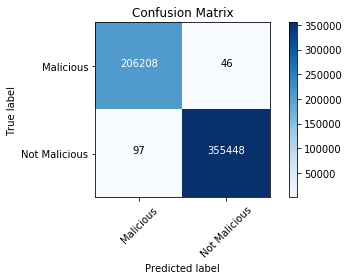

In [132]:
cm = confusion_matrix(dataset['Malicious?'], dataset['predictions'])
cm = np.flip(np.flip(cm,0),1)
cm_plot_labels = ['Malicious', 'Not Malicious', ]
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [143]:
accuracy = 100 * (cm[0][0] + cm[1,1]) / cm.sum()
precision = 100 * cm[0][0] / (cm[0][0] + cm[0][1]) 
recall = 100 * cm[0][0] / (cm[0][0] + cm[1,0])
print('Accuracy', round(accuracy,3), 'Precision', round(precision,3), 'Recall', round(recall,3))

Accuracy 99.975 Precision 99.978 Recall 99.953


### Old

In [98]:
results, dataframes = process_suricata_and_snort()
display(results)
display(dataframes[0][[ 'key', 'Classification', 'count_actual', 'count_suricata', 'count_snort']])

True Positive  False Positive  False Negative  \
Name of Dataset                                                              
CTU-IoT-Malware-Capture-1-1            298               4          190871   

                             True Negative  Accuracy  Precision  Recall  
Name of Dataset                                                          
CTU-IoT-Malware-Capture-1-1         429669     69.26      98.68    0.16

key  Classification  \
0           192.168.100.103_43763_154.8.94.65_14336   True Negative   
1             192.168.100.103_41101_111.40.23.49_23  False Negative   
2       192.168.100.103_43763_196.170.198.141_11764   True Negative   
3          192.168.100.103_50244_120.210.108.200_23  False Negative   
4        192.168.100.103_43763_118.112.204.139_2441   True Negative   
...                                             ...             ...   
620837   192.168.100.103_43763_255.19.119.244_46526   True Negative   
620838     192.168.100.103_43763_232.77.38.85_61258   True Negative   
620839      192.168.100.103_46674_177.238.46.183_23  False Negative   
620840   192.168.100.103_43763_100.57.245.196_39435   True Negative   
620841   192.168.100.103_43763_125.118.76.124_46443   True Negative   

        count_actual  count_suricata  count_snort  
0                  1               1            1  
1                  1               1            1  
2                  1               1            1  
3                  1               1            1  
4                  1               1            1  
...              ...             ...          ...  
620837             1               0            0  
620838             1               0            0  
620839             1               0            0  
620840             1               0            0  
620841             1               0            0  

[620842 rows x 5 columns]

In [136]:
wdf

key  Classification  \
0           192.168.100.103_43763_154.8.94.65_14336   True Negative   
1             192.168.100.103_41101_111.40.23.49_23  False Negative   
2       192.168.100.103_43763_196.170.198.141_11764   True Negative   
3          192.168.100.103_50244_120.210.108.200_23  False Negative   
4        192.168.100.103_43763_118.112.204.139_2441   True Negative   
...                                             ...             ...   
620837   192.168.100.103_43763_255.19.119.244_46526   True Negative   
620838     192.168.100.103_43763_232.77.38.85_61258   True Negative   
620839      192.168.100.103_46674_177.238.46.183_23  False Negative   
620840   192.168.100.103_43763_100.57.245.196_39435   True Negative   
620841   192.168.100.103_43763_125.118.76.124_46443   True Negative   

        count_actual  count_suricata  count_snort  
0                  1               1            1  
1                  1               1            1  
2                  1               1            1  
3                  1               1            1  
4                  1               1            1  
...              ...             ...          ...  
620837             1               0            0  
620838             1               0            0  
620839             1               0            0  
620840             1               0            0  
620841             1               0            0  

[620842 rows x 5 columns]

In [147]:
classification = (wdf.loc[(wdf['count_suricata'] == 1) & (wdf['count_snort'] == 1)]).groupby('Classification')['key'].count()

In [148]:
confusion_matrix = [classification.loc[metric] if metric in classification.index else 0 for metric in ['True Positive', 'False Positive', 'False Negative', 'True Negative']]
accuracy = 100 * (confusion_matrix[0] + confusion_matrix[3]) / sum(confusion_matrix)
precision = 100 * confusion_matrix[0] / (confusion_matrix[0] + confusion_matrix[1]) 
recall = 100 * confusion_matrix[0] / (confusion_matrix[0] + confusion_matrix[2])

In [149]:
confusion_matrix

[2, 4, 732, 30379]

In [150]:
output = confusion_matrix + [accuracy] + [precision] + [recall]

In [152]:
output

[2, 4, 732, 30379, 97.63473342545875, 33.333333333333336, 0.2724795640326976]

In [154]:
header = ['True Positive', 'False Positive', 'False Negative', 'True Negative', 'Accuracy', 'Precision', 'Recall']
pd.DataFrame(data=[output], columns=header, index=['Merged'])

True Positive  False Positive  False Negative  True Negative  \
Merged              2               4             732          30379   

        Accuracy  Precision  Recall  
Merged     97.63      33.33    0.27

In [122]:
wdf.loc[(wdf['count_suricata'] == 1) & (wdf['count_snort'] == 1)] #includ only rows where suricata and snort count equals 1

key  Classification  \
0          192.168.100.103_43763_154.8.94.65_14336   True Negative   
1            192.168.100.103_41101_111.40.23.49_23  False Negative   
2      192.168.100.103_43763_196.170.198.141_11764   True Negative   
3         192.168.100.103_50244_120.210.108.200_23  False Negative   
4       192.168.100.103_43763_118.112.204.139_2441   True Negative   
...                                            ...             ...   
49980   192.168.100.103_43763_42.100.177.211_17929   True Negative   
49981   192.168.100.103_43763_147.193.140.226_2320   True Negative   
49982   192.168.100.103_43763_39.104.248.169_56720   True Negative   
49983    192.168.100.103_43763_62.53.190.174_19625   True Negative   
49997      192.168.100.103_39319_42.206.206.227_23  False Negative   

       count_actual  count_suricata  count_snort  
0                 1               1            1  
1                 1               1            1  
2                 1               1            1  
3                 1               1            1  
4                 1               1            1  
...             ...             ...          ...  
49980             1               1            1  
49981             1               1            1  
49982             1               1            1  
49983             1               1            1  
49997             3               1            1  

[31117 rows x 5 columns]

In [126]:
wdf.loc[~((wdf['count_suricata'] == 1) & (wdf['count_snort'] == 1))] # exclude all 1 and 1

key  Classification  \
9           192.168.100.103_56305_63.150.16.171_23  False Negative   
11            192.168.100.103_44301_91.42.47.63_23  False Negative   
15        192.168.100.103_42207_10.169.219.98_8080  False Negative   
16         192.168.100.103_58525_177.75.151.125_23  False Negative   
17         192.168.100.103_51524_65.127.233.163_23  False Negative   
...                                            ...             ...   
620837  192.168.100.103_43763_255.19.119.244_46526   True Negative   
620838    192.168.100.103_43763_232.77.38.85_61258   True Negative   
620839     192.168.100.103_46674_177.238.46.183_23  False Negative   
620840  192.168.100.103_43763_100.57.245.196_39435   True Negative   
620841  192.168.100.103_43763_125.118.76.124_46443   True Negative   

        count_actual  count_suricata  count_snort  
9                  2               1            2  
11                 2               1            2  
15                 1               1            3  
16                 2               1            2  
17                 3               1            5  
...              ...             ...          ...  
620837             1               0            0  
620838             1               0            0  
620839             1               0            0  
620840             1               0            0  
620841             1               0            0  

[589725 rows x 5 columns]

In [12]:
def compare(suricata=None, snort=None, joined=None):
    header = ['True Positive', 'False Positive', 'False Negative', 'True Negative', 'Accuracy', 'Precision', 'Recall']
    suricata = [2786, 22, 188391, 429651, 69.65, 99.22, 1.46]
    snort = [16578,31609,174591,398064,66.79,34.40,8.67]
    joined = [19066, 31627, 172111, 398046, 67.18, 37.61, 9.97]
    output = [suricata, snort, joined]
    return pd.DataFrame(data=output, columns=header, index=['Suricata', 'Snort', 'Joined'] , dtype='int')
compare(suricata, snort, joined)

NameError: name 'suricata' is not defined

In [ ]:
# display(actual.head(15))
# display(predicted.head(15))
# actual.loc[actual['Malicious?'] == True]
#sum(actual['bool_sum'] > 0)